In [21]:
#======Core============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# import pytorch_lightning as pl
# from pytorch_lightning.callbacks import EarlyStopping
import torch
#======Darts===========
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import NBEATSModel
#======UEXP============
from ue.uexp.dataprocessing.processor_binance import BinanceProcessor
from ue.uexp.dataprocessing.func import *
#from ue.uexp.dataprocessing.ta import *
#from ue.uexp.models.util import *

import warnings
warnings.filterwarnings('ignore')

In [25]:
### get data (set config params)
ticker_list = ["BTCUSDT"]
start_date = "2021-12-15"
end_date = "2021-12-31"
time_interval = "1m"

p = BinanceProcessor("binance")
df = p.download_data(ticker_list, start_date, end_date, time_interval)

In [26]:
df.drop("tic", axis=1, inplace=True)

In [27]:
df.head()

,time,open,high,low,close,volume,adj_close
0,2021-12-15 00:00:00,48120.88,48157.41,48120.87,48136.00,14.51234,48136.00
1,2021-12-15 00:01:00,48136.00,48145.09,48112.28,48129.20,9.31538,48129.20
2,2021-12-15 00:02:00,48129.20,48185.21,48126.67,48184.64,12.80545,48184.64
3,2021-12-15 00:03:00,48184.64,48186.88,48173.02,48178.98,6.95185,48178.98
4,2021-12-15 00:04:00,48178.99,48189.66,48156.08,48187.29,17.31493,48187.29


In [5]:
dfts = TimeSeries.from_dataframe(df)

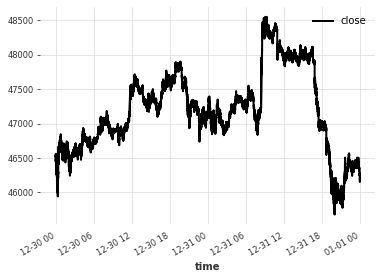

In [6]:
dfts['close'].plot()

In [7]:
close_train = dfts['close'][:int(0.8*df.shape[0])]

In [8]:
close_val = dfts['close'][int(0.8*df.shape[0]):]

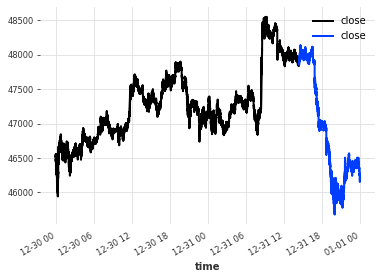

In [9]:
close_train.plot()
close_val.plot()

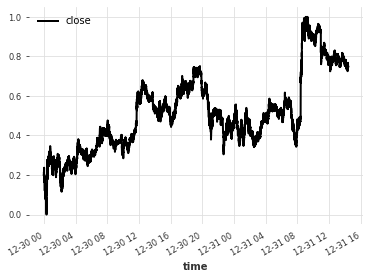

In [10]:
scaler = Scaler()
# [0] because singular
close_train_scaled = scaler.fit_transform([close_train])[0]

close_train_scaled.plot()

## Model

In [11]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

In [12]:
model.fit([close_train_scaled], epochs=5, verbose=True)

[2022-02-22 01:12:27,003] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 138205 samples.
[2022-02-22 01:12:27,003] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 138205 samples.
[2022-02-22 01:12:27,041] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-22 01:12:27,041] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-22 01:12:27,041] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_bar`, `progress_bar_refresh_rate` and `enable_model_summary` in the `pl_trainer_kwargs` dict at model creation.
[2022-02-22 01:12:27,041] WARNING | darts.models.forecasting.torch_forecasting_model | D

Training: 0it [00:00, ?it/s]

In [13]:
pred_train_close = model.predict(series=close_train_scaled, n=36)

Predicting: 4319it [00:00, ?it/s]

In [14]:
# scale back:
pred_train_close = scaler.inverse_transform([pred_train_close])

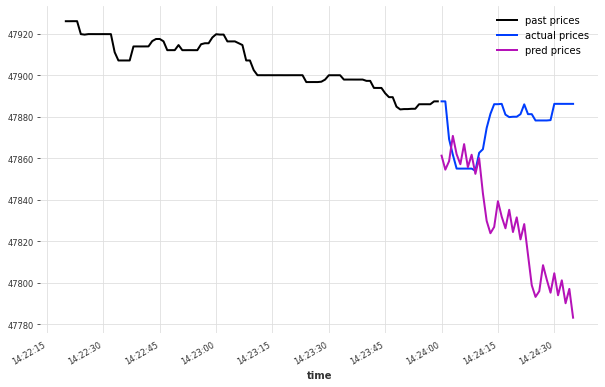

In [19]:
plt.figure(figsize=(10, 6))
# prev train
close_train[-100:].plot(label="past prices")
#actual
close_val[:36].plot(label="actual prices")
# pred
pred_train_close[0].plot(label="pred prices")

## Historical Forecast

In [16]:
hist_for = model.historical_forecasts(
    series=close_train_scaled,
    start=0.99, #just the last 1 percent
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)

  0%|          | 0/276 [00:00<?, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

Predicting: 4319it [00:00, ?it/s]

In [17]:
# rescale
# scale back:
hist_for = scaler.inverse_transform(hist_for)

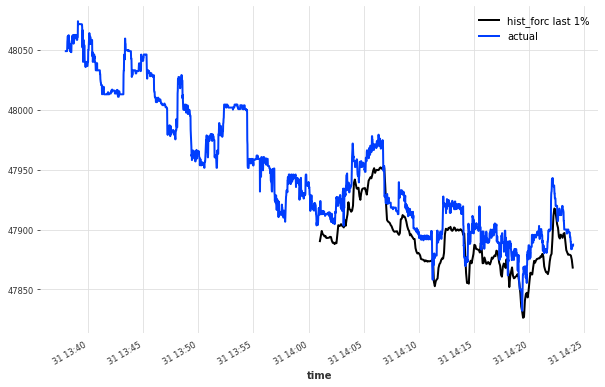

In [20]:
plt.figure(figsize=(10, 6))
hist_for.plot(label="hist_forc last 1%")
close_train[-2760:].plot(label="actual")